# Generating waveforms with GWSignal

* The steps required to generate waveforms with GWSignal are the same as those for generating waveforms with LALSimulation, with the caveat of defining all the parameters with astropy units. 
* Hence, we will first define the parameters with their dimensions and put that in a python dictionary.
* We will then define an instance of the generator class and then generate the waveform using GenerateTD/FDWaveform and generate the modes using GenerateTD/FDModes.


In [1]:
# Import base python packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import lalsuite packages
import lalsimulation as lalsim
import lal

# Import GWSignal packagess
import lalsimulation.gwsignal as gw
import lalsimulation.gwsignal.core.utils as ut
import lalsimulation.gwsignal.core.waveform as wfm

# Import astropy and GWPy 
import astropy.units as u
from gwpy.timeseries import TimeSeries
import lalsimulation.gwsignal.models.pyseobnr_model as seob


In [2]:
# Mass / spin parameters
m1 = 20.*u.solMass
m2 = 30.*u.solMass
s1x = 0.*u.dimensionless_unscaled
s1y = 0.*u.dimensionless_unscaled
s1z = 0.*u.dimensionless_unscaled
s2x = 0.*u.dimensionless_unscaled
s2y = 0.*u.dimensionless_unscaled
s2z = 0.*u.dimensionless_unscaled

deltaT = 1./512.*u.s
f_min = 20.*u.Hz
f_ref = 20.*u.Hz
distance = 1000.*u.Mpc
inclination = 0.*u.rad
phiRef = 0.*u.rad
eccentricity = 0.*u.dimensionless_unscaled
longAscNodes = 0.*u.rad
meanPerAno = 0.*u.rad

# Whether the waveforms should be conditioned or not
condition = 0


approximant = 'IMRPhenomTPHM'


In [3]:
python_dict = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaT' : deltaT,
              'f22_start' : f_min,
              'f22_ref': f_ref,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
              'condition' : condition}


We want to call one of the waveforms (`IMRPhenomTPHM`) which is implemented in LALSuite. Hence, we will call the `LALCompactBinaryCoalescenceGenerator` class. Later on in the document, we will generate a waveform for the NRSurrogate7dq4 waveform model implemented in GWSignal

In [4]:
gen = wfm.LALCompactBinaryCoalescenceGenerator(approximant)

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [5]:
hp, hc = wfm.GenerateTDWaveform(python_dict, gen)

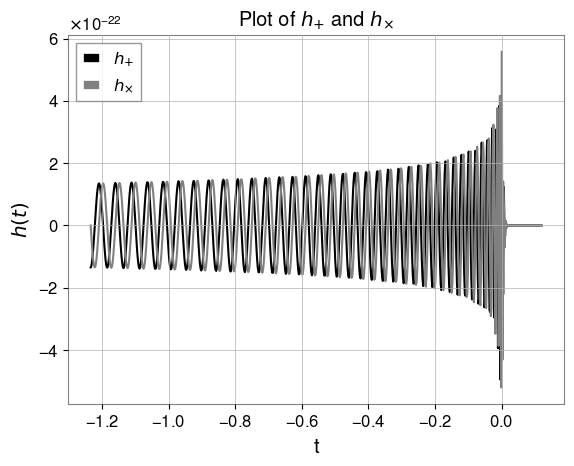

In [6]:
plt.plot(hp , 'black' ,label=r'$h_{+}$')
plt.plot(hc , 'gray', label=r'$h_{\times}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of $h_{+}$ and $h_{\times}$');
plt.legend(loc='best')

GenerateTD/FDWaveform can also return the polarizations as an instance of the `GravitationalWavePolarizations` class which can generate the strain given a detector, sky-position, time of arrival and polarization values.

In [7]:
gwf = wfm.GenerateTDWaveform(python_dict, gen)

In [8]:
ra = 0.2*u.rad
dec = 0.2*u.rad
psi = 0.5*u.rad
tgps = 1126259462

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/lalsimulation/gwsignal/core/gw.py:54: UserWarning: This code is currently UNREVIEWED, use with caution!!
  warnings.warn("This code is currently UNREVIEWED, use with caution!!")


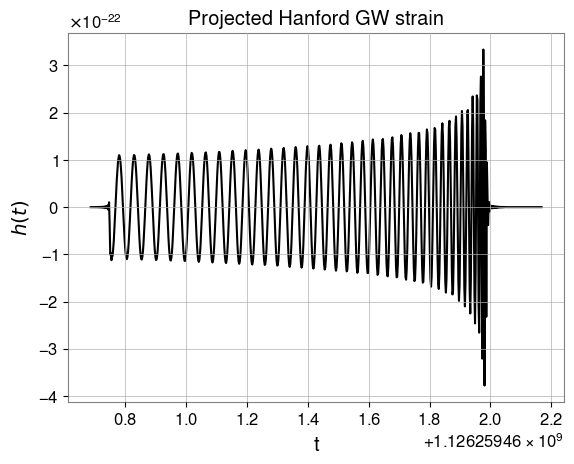

In [9]:
plt.plot(gwf.strain('H1', ra, dec, psi, tgps) , 'black' ,label=r'$h_{t}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Projected Hanford GW strain');
#plt.legend(loc='best')

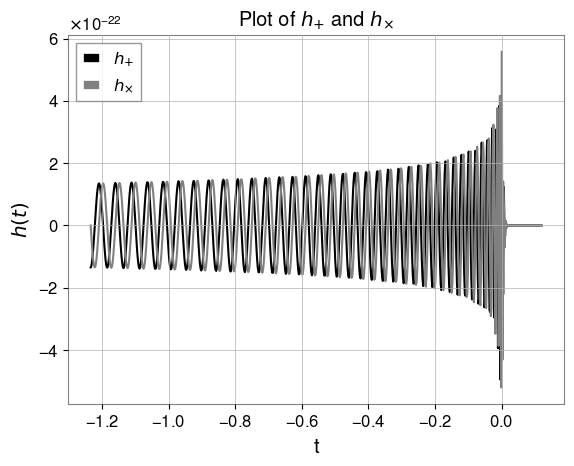

In [10]:
plt.plot(gwf.hp , 'black' ,label=r'$h_{+}$')
plt.plot(gwf.hc , 'gray', label=r'$h_{\times}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of $h_{+}$ and $h_{\times}$');
plt.legend(loc='best')

* Let now generate a Frequency domain waveform

In [11]:
df = 1./8*u.Hz
f_max = 2048.*u.Hz

python_dict = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaF' : df,
              'f22_start' : f_min,
              'f22_ref': f_ref,
               'f_max': f_max,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
              'condition' : condition}

approximant = 'IMRPhenomXPHM'
gen = wfm.LALCompactBinaryCoalescenceGenerator(approximant)

In [12]:
hpf, hcf = wfm.GenerateFDWaveform(python_dict, gen)

(1e-27, 1e-22)

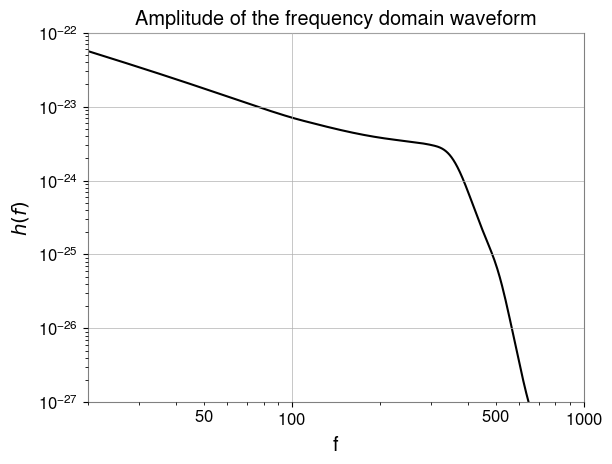

In [13]:
plt.loglog(hpf.frequencies,abs(hpf+1j*hcf), color='black')


plt.xlabel(r'f');
plt.ylabel(r'$h(f)$');
plt.title(r'Amplitude of the frequency domain waveform');
plt.xlim(20, 1e3)
plt.ylim(1e-27, 1e-22)
#plt.legend(loc='best')

In [14]:
gwf = wfm.GenerateFDWaveform(python_dict, gen)

In [15]:
ra = 0.2*u.rad
dec = 0.2*u.rad
psi = 0.5*u.rad

In [16]:
strain = gwf.strain('H1', ra, dec, psi, tgps)

(1e-27, 1e-22)

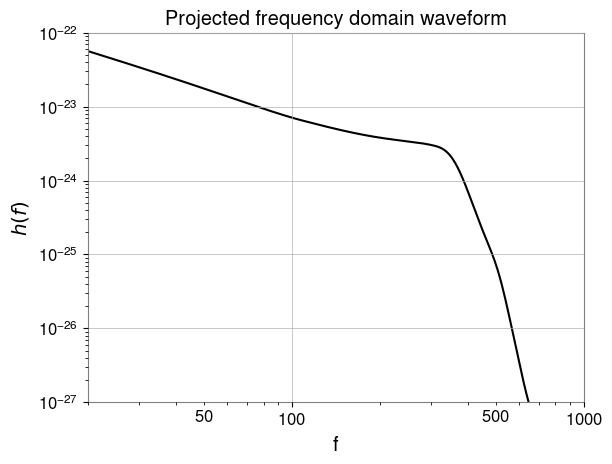

In [17]:
plt.loglog(hpf.frequencies,abs(hpf+1j*hcf), color='black')

plt.xlabel(r'f');
plt.ylabel(r'$h(f)$');
plt.title(r'Projected frequency domain waveform');
plt.xlim(20, 1e3)
plt.ylim(1e-27, 1e-22)
#plt.legend(loc='best')

To generate modes, use the GenerateTD/FDModes function with the same python_dict - generator function. The GenerateTD/FDModes returns an instance of the `GravitationalWaveModes` class. 

In [18]:
python_dict = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaT' : deltaT,
              'f22_start' : f_min,
              'f22_ref': f_ref,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
              'condition' : 0}


In [19]:
gen = wfm.LALCompactBinaryCoalescenceGenerator('IMRPhenomTPHM')

In [20]:
hlm = wfm.GenerateTDModes(python_dict, gen)

In [21]:
hlm['time_array'] = hlm[2,2].times

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


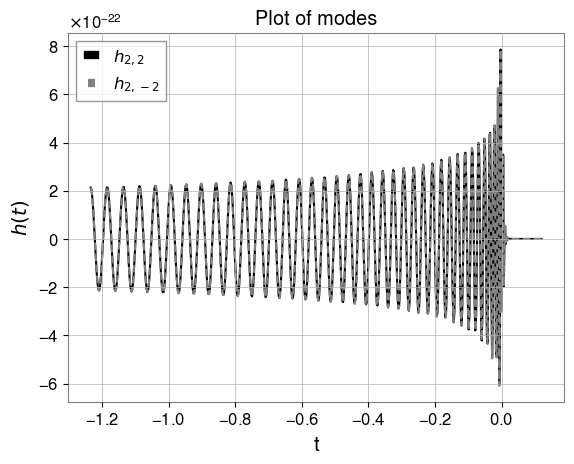

In [22]:
plt.plot(hlm['time_array'], hlm[(2,2)] , 'black' ,label=r'$h_{2,2}$')
plt.plot(hlm['time_array'], hlm[(2,-2)] , 'gray', ls='--', label=r'$h_{2,-2}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of modes');
plt.legend(loc='best')

The `GravitationalWaveModes` class can recombine the modes given a theta-phi value to generate the gravitational wave polarizations, which are again an instance of the `GravitationalWavePolarizations` class. 

In [25]:
gwf_pib2 = hlm(np.pi/2*u.rad, 0.*u.rad)
gwf_0 = hlm(0.*u.rad, 0.*u.rad)


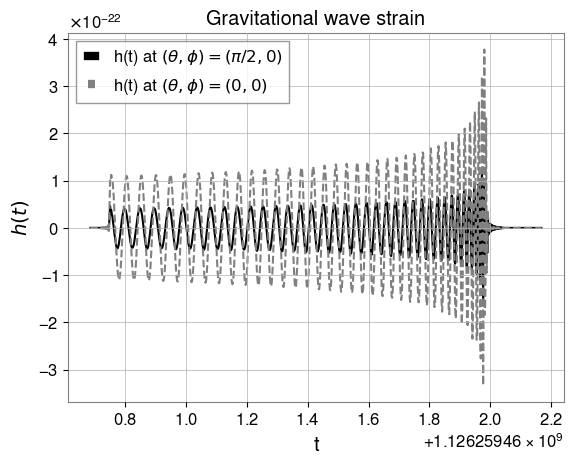

In [26]:
plt.plot(gwf_pib2.strain('H1', ra, dec, psi, tgps) , 'black' ,label=r'h(t) at $(\theta, \phi) = (\pi/2, 0)$')
plt.plot(gwf_0.strain('H1', ra, dec, psi, tgps) , 'gray', ls='--', label=r'h(t) at $(\theta, \phi) = (0, 0)$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Gravitational wave strain');
plt.legend(loc='best')

Now, lets generate the frequency domain gravitational wave modes

In [27]:
python_dict = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaF' : df,
              'f22_start' : f_min,
              'f22_ref': f_ref,
               'f_max': f_max,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
              'condition' : condition}


In [28]:
gen = wfm.LALCompactBinaryCoalescenceGenerator('IMRPhenomXPHM')

In [29]:
hlm = wfm.GenerateFDModes(python_dict, gen)

In [30]:
hlm['frequency_array'] = hlm[2,2].frequencies

(1e-27, 1e-21)

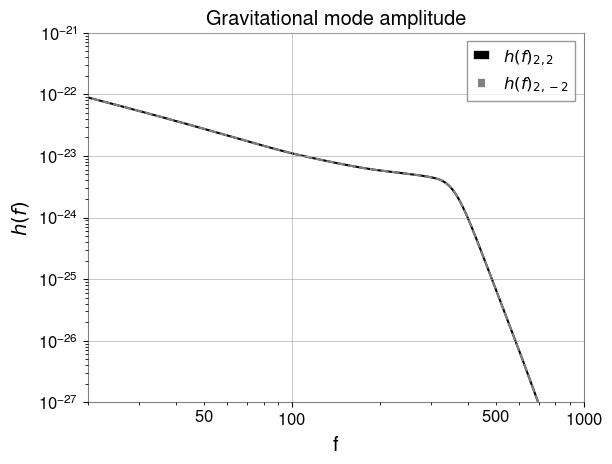

In [31]:
plt.loglog(abs(hlm['frequency_array']), abs(hlm[(2,2)]) , 'black' ,label=r'$h(f)_{2,2}$')
plt.loglog(abs(hlm['frequency_array']), abs(hlm[(2,2)]) , 'gray', ls='--', label=r'$h(f)_{2,-2}$')

plt.xlabel(r'f');
plt.ylabel(r'$h(f)$');
plt.title(r'Gravitational mode amplitude');
plt.legend(loc='best')
plt.xlim(20, 1e3)
plt.ylim(1e-27, 1e-21)

Generate and plot the frequency domain gravitational wave polarization amplitudes

In [33]:
gwf_pib2 = hlm(np.pi/2*u.rad, 0.*u.rad)
gwf_0 = hlm(0.*u.rad, 0.*u.rad)


(1e-27, 1e-21)

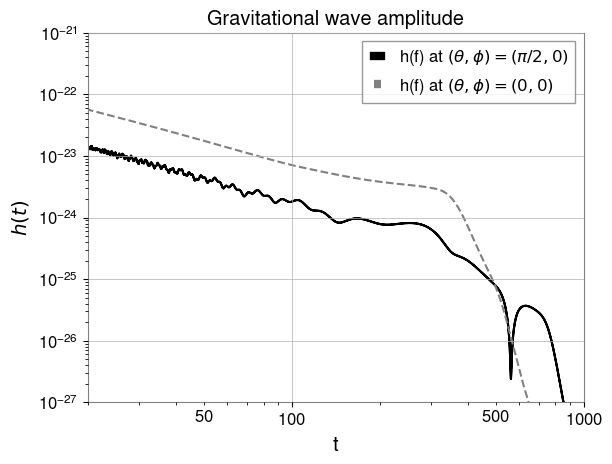

In [34]:
plt.loglog(abs(hlm['frequency_array']), abs(gwf_pib2.hp + 1j*gwf_pib2.hc) , 'black' ,label=r'h(f) at $(\theta, \phi) = (\pi/2, 0)$')
plt.loglog(abs(hlm['frequency_array']), abs(gwf_0.hp + 1j*gwf_0.hc), 'gray', ls='--', label=r'h(f) at $(\theta, \phi) = (0, 0)$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Gravitational wave amplitude');
plt.legend(loc='best')
plt.xlim(20, 1e3)
plt.ylim(1e-27, 1e-21)

Generate and plot the frequency domain gravitational wave strain

(1e-27, 1e-21)

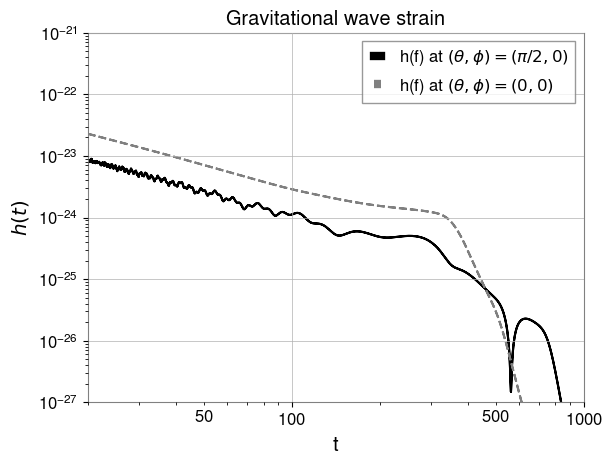

In [35]:
plt.loglog(abs(hlm['frequency_array']), abs(gwf_pib2.strain('H1', ra, dec, psi, tgps)) , 'black' ,label=r'h(f) at $(\theta, \phi) = (\pi/2, 0)$')
plt.loglog(abs(hlm['frequency_array']), abs(gwf_0.strain('H1', ra, dec, psi, tgps)), 'gray', ls='--', label=r'h(f) at $(\theta, \phi) = (0, 0)$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Gravitational wave strain');
plt.legend(loc='best')
plt.xlim(20, 1e3)
plt.ylim(1e-27, 1e-21)

Generate the time-domain `SEOBNRv5PHM` waveform via the GWSignal implementation

In [38]:
# start with the usual parameter definitions
m1 = 50.*u.solMass
m2 = 50.*u.solMass
s1x = 0.*u.dimensionless_unscaled
s1y = 0.*u.dimensionless_unscaled
s1z = 0.*u.dimensionless_unscaled
s2x = 0.*u.dimensionless_unscaled
s2y = 0.*u.dimensionless_unscaled
s2z = 0.*u.dimensionless_unscaled

deltaT = 1./1024.*u.s
f_min = 20.*u.Hz
f_ref = 20.*u.Hz
distance = 1000.*u.Mpc
inclination = 0.*u.rad

phiRef = 0.*u.rad
eccentricity = 0.*u.dimensionless_unscaled
longAscNodes = 0.*u.rad
meanPerAno = 0.*u.rad

python_dict_nrsur = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaT' : deltaT,
              'f22_start' : f_min,
              'f22_ref': f_ref,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
                'condition': 0}

In [39]:
gen = seob.SEOBNRv5PHM()

In [40]:
hlm = wfm.GenerateTDModes(python_dict_nrsur, gen)

In [41]:
hlm['time_array'] = hlm[(2,2)].times

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


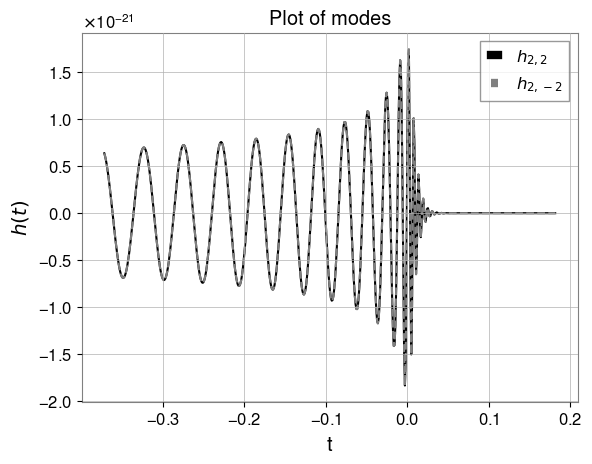

In [42]:
plt.plot(hlm['time_array'], hlm[(2,2)] , 'black' ,label=r'$h_{2,2}$')
plt.plot(hlm['time_array'], hlm[(2,-2)] , 'gray', ls='--', label=r'$h_{2,-2}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of modes');
plt.legend(loc='best')

In [44]:
gwf_pib2 = hlm(np.pi/2*u.rad, 0.*u.rad)
gwf_0 = hlm(0.*u.rad, 0.*u.rad)


/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/lalsimulation/gwsignal/core/gw.py:54: UserWarning: This code is currently UNREVIEWED, use with caution!!
  warnings.warn("This code is currently UNREVIEWED, use with caution!!")


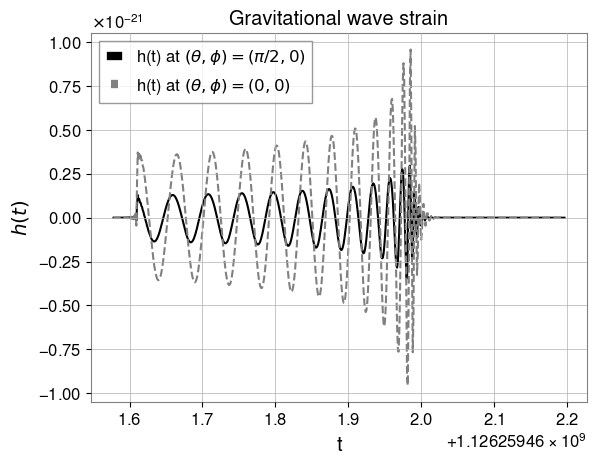

In [45]:
plt.plot(gwf_pib2.strain('H1', ra, dec, psi, tgps) , 'black' ,label=r'h(t) at $(\theta, \phi) = (\pi/2, 0)$')
plt.plot(gwf_0.strain('H1', ra, dec, psi, tgps) , 'gray', ls='--', label=r'h(t) at $(\theta, \phi) = (0, 0)$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Gravitational wave strain');
plt.legend(loc='best')

Generate the time-domain polarizations

In [46]:
hp, hc = wfm.GenerateTDWaveform(python_dict_nrsur, gen)

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/gwpy/types/series.py:131: UserWarning: xindex was given to TimeSeries(), x0 will be ignored
  warn("xindex was given to %s(), x0 will be ignored"


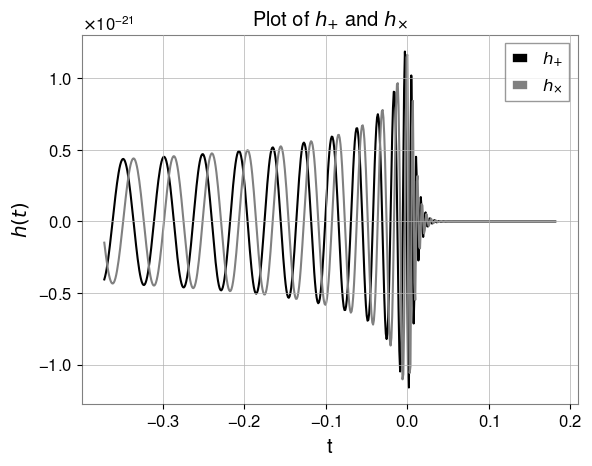

In [47]:
plt.plot(hp , 'black' ,label=r'$h_{+}$')
plt.plot(hc , 'gray', label=r'$h_{\times}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of $h_{+}$ and $h_{\times}$');
plt.legend(loc='best')

Generate conditioned waveforms by setting condition=1


In [48]:
python_dict_nrsur = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaT' : deltaT,
              'f22_start' : f_min,
              'f22_ref': f_ref,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
                'condition': 1}

In [49]:
hp, hc = wfm.GenerateTDWaveform(python_dict_nrsur, gen)

/home/chinmay.kalaghatgi/.conda/envs/lalsuite-dev/lib/python3.10/site-packages/gwpy/types/series.py:131: UserWarning: xindex was given to TimeSeries(), x0 will be ignored
  warn("xindex was given to %s(), x0 will be ignored"


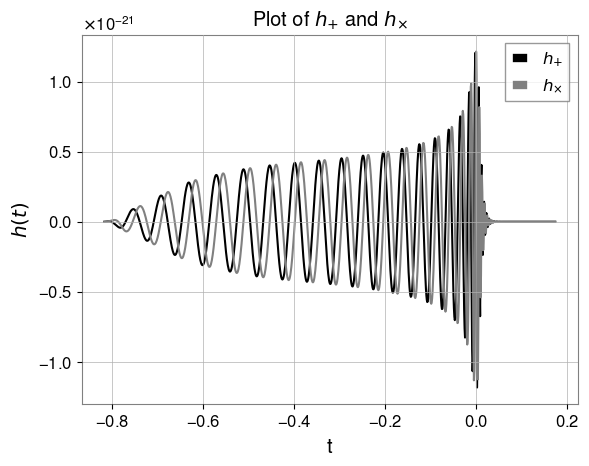

In [50]:
plt.plot(hp , 'black' ,label=r'$h_{+}$')
plt.plot(hc , 'gray', label=r'$h_{\times}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of $h_{+}$ and $h_{\times}$');
plt.legend(loc='best')

With conditioning on, its possible to generate a FD waveform from a time-domain only model

In [51]:
python_dict = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaF' : df,
              'f22_start' : f_min,
              'f22_ref': f_ref,
               'f_max': f_max,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
              'condition' : 1}


In [52]:
hp, hc = wfm.GenerateFDWaveform(python_dict, gen)

(10, 1000.0)

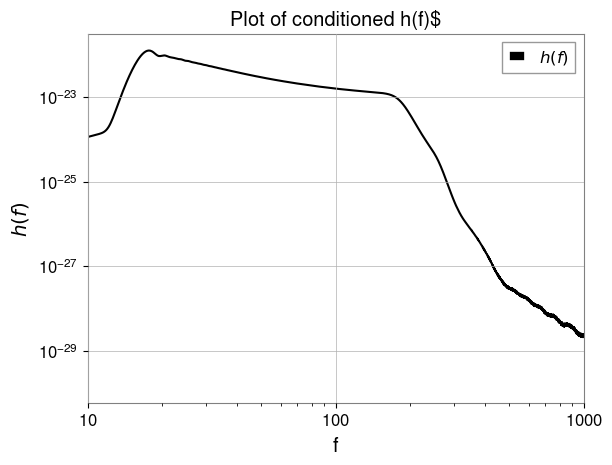

In [53]:
plt.loglog(abs(hp+1j*hc) , 'black' ,label=r'$h(f)$')

plt.xlabel(r'f');
plt.ylabel(r'$h(f)$');
plt.title(r'Plot of conditioned h(f)$');
plt.legend(loc='best')
plt.legend(loc='best')
plt.xlim(10, 1e3)
#plt.ylim(1e-27, 1e-21)

## Calling model in python-interface using ExternalPython C generator

In [54]:
# Define the python dict
python_dict_nrsur = {'mass1' : m1,
              'mass2' : m2,
              'spin1x' : s1x,
              'spin1y' : s1y,
              'spin1z' : s1z,
              'spin2x' : s2x,
              'spin2y' : s2y,
              'spin2z' : s2z,
              'deltaT' : 1./1024.*u.s,
              'f22_start' : f_min,
              'f22_ref': f_ref,
              'phi_ref' : phiRef,
              'distance' : distance,
              'inclination' : inclination,
              'eccentricity' : eccentricity,
              'longAscNodes' : longAscNodes,
              'meanPerAno' : meanPerAno,
                'condition': 1}

In [55]:
# Convert to laldict

lal_dict = lalsim.gwsignal.core.utils.to_lal_dict(python_dict_nrsur)


In [56]:
# Choose the ExternalPython generator

lal_approximant = lalsim.ExternalPython

The `ExternalPython` generator has two extra parameters required.

i) `module`  - This should specify the python module from which the Generator class has to be read from.

ii) `object` - The actual generator class within that module. Essentially, the generator as you would call it in python. 

In [59]:
lal.DictInsertStringValue(lal_dict, "module", 'lalsimulation.gwsignal.models.pyseobnr_model')
lal.DictInsertStringValue(lal_dict, "object", 'SEOBNRv5PHM')

0

In [60]:
generator = lalsim.SimInspiralChooseGenerator(lal_approximant, lal_dict)


In [61]:
hp, hc = lalsim.SimInspiralGenerateTDWaveform(lal_dict, generator)
shift = hp.epoch.gpsSeconds + hp.epoch.gpsNanoSeconds/1e9
times = np.arange(len(hp.data.data))*hp.deltaT + shift 

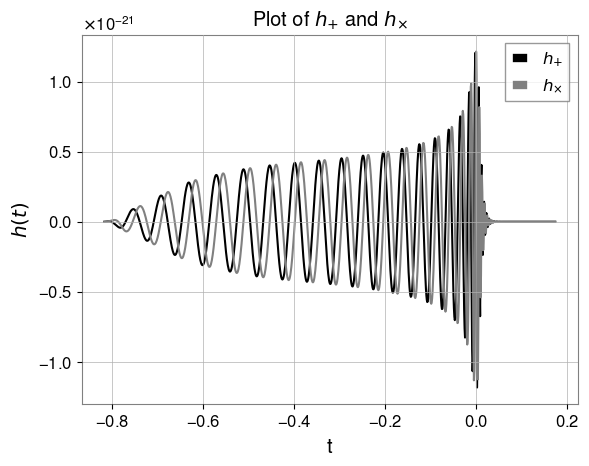

In [62]:
plt.plot(times, hp.data.data , 'black' ,label=r'$h_{+}$')
plt.plot(times, hc.data.data , 'gray', label=r'$h_{\times}$')

plt.xlabel(r't');
plt.ylabel(r'$h(t)$');
plt.title(r'Plot of $h_{+}$ and $h_{\times}$');
plt.legend(loc='best')

In [63]:
#TODO : Fix the generate TD modes error
hlm = lalsim.SimInspiralGenerateTDModes(lal_dict, generator)


AttributeError: 'lal.LIGOTimeGPS' object has no attribute 'to_value'

XLAL Error - AstropyTime_AsLIGOTimeGPS (LALSimInspiralGeneratorPython.c:282): Could not call method .to_value()
XLAL Error - AstropyTime_AsLIGOTimeGPS (LALSimInspiralGeneratorPython.c:282): Generic failure
XLAL Error - python_error (LALSimInspiralGeneratorPython.c:88): Python exception raised
XLAL Error - GWpyTimeSeries_AsCOMPLEX16TimeSeries (LALSimInspiralGeneratorPython.c:597): Internal function call failed: Generic failure
XLAL Error - generate_td_modes (LALSimInspiralGeneratorPython.c:938): Check failed: this->mode
XLAL Error - generate_td_modes (LALSimInspiralGeneratorPython.c:938): Internal function call failed: Generic failure


In [64]:
#hlm_dict={}

In [65]:
# hlm_dict[2,2] = lalsim.SphHarmTimeSeriesGetMode(hlm, 2, 2)
# hlm_dict[3,3] = lalsim.SphHarmTimeSeriesGetMode(hlm, 3, 3)

In [66]:
# plt.plot(times, hlm_dict[2,2].data.data , 'black' ,label=r'$h_{2,2}$')
# plt.xlabel(r't');
# plt.ylabel(r'$h(t)$');
# plt.title(r'Plot of $h_{\ell, m}$');
# plt.legend(loc='best')

In [67]:
# plt.plot(times, hlm_dict[3,3].data.data , 'gray', label=r'$h_{3,3}$')

# plt.xlabel(r't');
# plt.ylabel(r'$h(t)$');
# plt.title(r'Plot of $h_{\ell, m}$');
# plt.legend(loc='best')